In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [178]:
image = cv2.imread("29.jpg", )
b,g,r = cv2.split(image)
img1 = cv2.merge((r,g,b))
image = cv2.imread("39.jpg", )
b,g,r = cv2.split(image)
img2 = cv2.merge((r,g,b))

<IPython.core.display.Javascript object>


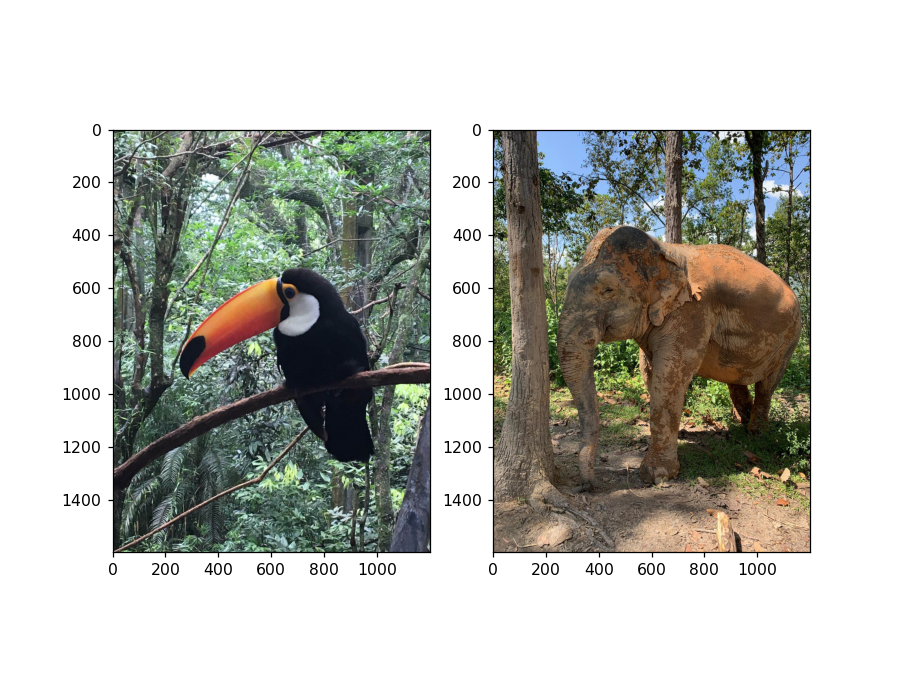

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2489249ac88>)

In [179]:
plt.figure(figsize=(8,6))
plt.subplot(121), plt.imshow(img1)
plt.subplot(122), plt.imshow(img2)

<IPython.core.display.Javascript object>


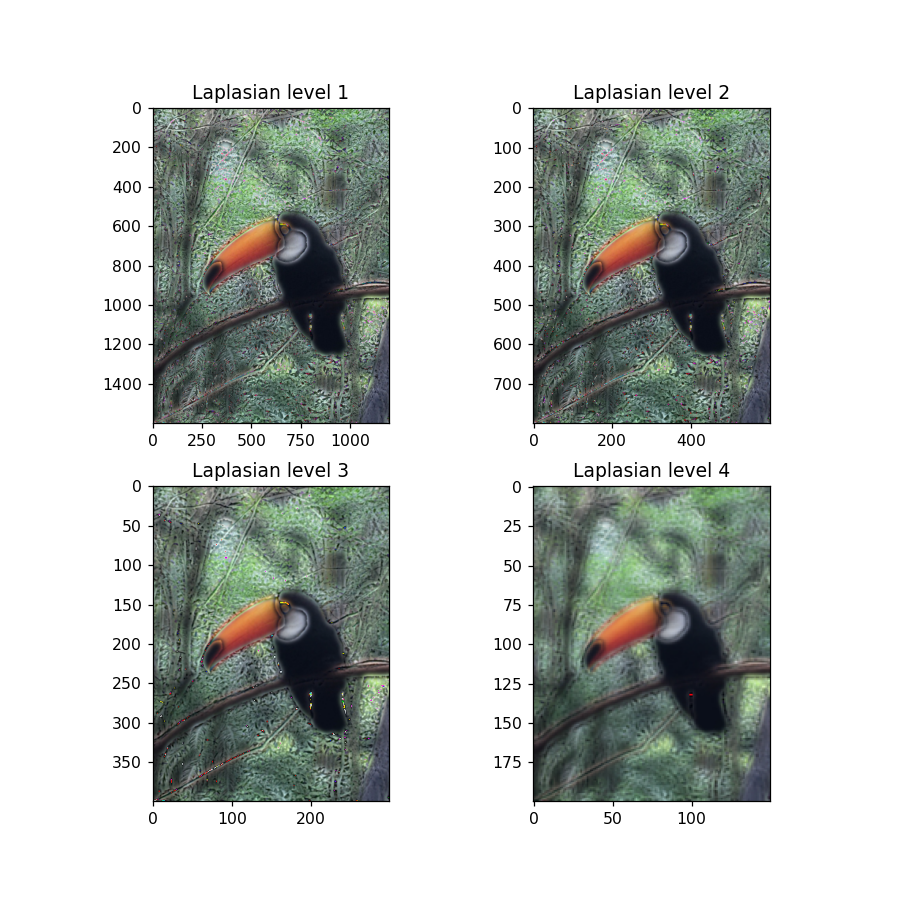

In [185]:
# 3a

cropped1 = img1[500:1500,245:845,:]
g1 = cv2.pyrDown(img1)
l11 = cv2.pyrUp(g1) - img1
g2 = cv2.pyrDown(g1)
l12 = cv2.pyrUp(g2) - g1 
g13 = cv2.pyrDown(g2)
l13 = cv2.pyrUp(g13) - g2
g14 = cv2.pyrDown(g13)
l14 = cv2.pyrUp(g14) - g13
g15 = cv2.pyrDown(g14)
l15= cv2.pyrUp(g15)[:,:75,:]- g14

lapPyr4 = cv2.pyrUp(g14) + l14
lapPyr3 = cv2.pyrUp(lapPyr4) + l13
lapPyr2 = cv2.pyrUp(lapPyr3) + l12
lapPyr1 = cv2.pyrUp(lapPyr2) + l11

plt.figure(figsize=(8,8))
plt.subplot(221), plt.imshow(lapPyr1), plt.title("Laplasian level 1")
plt.subplot(222), plt.imshow(lapPyr2), plt.title("Laplasian level 2")
plt.subplot(223), plt.imshow(lapPyr3), plt.title("Laplasian level 3")
plt.subplot(224), plt.imshow(lapPyr4), plt.title("Laplasian level 4")
plt.savefig("laplasianPyramid.png")

<IPython.core.display.Javascript object>


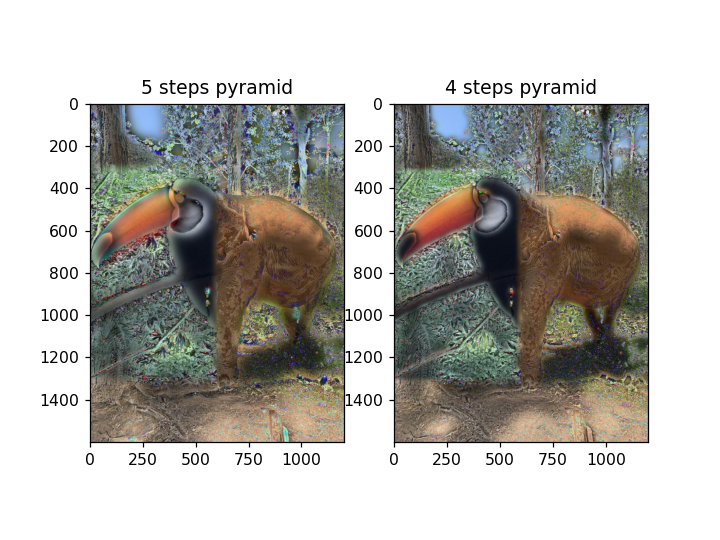

In [184]:
# 3b

cropped1 = img1[500:1500,245:845, :]
g1 = cv2.pyrDown(img1)
l11 = cv2.pyrUp(g1) - img1
g2 = cv2.pyrDown(g1)
l12 = cv2.pyrUp(g2) - g1 
g13 = cv2.pyrDown(g2)
l13 = cv2.pyrUp(g13) - g2
g14 = cv2.pyrDown(g13)
l14 = cv2.pyrUp(g14) - g13
g15 = cv2.pyrDown(g14)
l15= cv2.pyrUp(g15)[:,:75,:]- g14

cropped2 = img2[:,600:,:]
g1 = cv2.pyrDown(img2)
l21 = cv2.pyrUp(g1) - img2
g2 = cv2.pyrDown(g1)
l22 = cv2.pyrUp(g2) - g1 
g23 = cv2.pyrDown(g2)
l23 = cv2.pyrUp(g23) - g2
g24 = cv2.pyrDown(g23)
l24 = cv2.pyrUp(g24) - g23
g25 = cv2.pyrDown(g24)
l25= cv2.pyrUp(g25)[:,:75,:]- g24

# coordination of image 1 to take from
x11 = 500
x12 = 1500
y11 = 245
y12 = 845

# coordination from image 2 to paste on
x21 = 330
x22 = 1330
y21 = 0
y22 = 600

l21[x21:x22,y21:y22,:] = l11[x11:x12,y11:y12,:]
x11_ = int(x11/2); x12_ = int(x12/2); y11_ = int(y11/2) ; y12_ = int(y12/2)
x21_ = int(x21/2); x22_ = int(x22/2); y21_ = int(y21/2) ; y22_ = int(y22/2)
l22[x21_:x22_,y21_:y22_,:] = l12[x11_:x12_,y11_:y12_,:]
x11_ = int(x11/4); x12_ = int(x12/4); y11_ = int(y11/4) ; y12_ = int(y12/4)
x21_ = int(x21/4); x22_ = int(x22/4); y21_ = int(y21/4) ; y22_ = int(y22/4)
l23[x21_:x22_,y21_:y22_,:] = l13[x11_:x12_,y11_:y12_,:]
x11_ = int(x11/8); x12_ = int(x12/8); y11_ = int(y11/8) ; y12_ = int(y12/8)
x21_ = int(x21/8); x22_ = int(x22/8); y21_ = int(y21/8) ; y22_ = int(y22/8)
l24[x21_:x22_,y21_:y22_,:] = l14[x11_:x12_,y11_:y12_,:]
x11_ = int(x11/16); x12_ = int(x12/16); y11_ = int(y11/16) ; y12_ = int(y12/16)
x21_ = int(x21/16); x22_ = int(x22/16); y21_ = int(y21/16) ; y22_ = int(y22/16)
diff = ((x22_ - x21_) - (x12_ - x11_))
x22_ = x22_ - diff
l25[x21_:x22_,y21_:y22_,:] = l15[x11_:x12_,y11_:y12_,:]
g24[x21_:x22_,y21_:y22_,:] = g14[x11_:x12_,y11_:y12_,:]
x11_ = int(x11/32); x12_ = int(x12/32); y11_ = int(y11/32) ; y12_ = int(y12/32)
x21_ = int(x21/32); x22_ = int(x22/32); y21_ = int(y21/32) ; y22_ = int(y22/32)

diff = ((x22_ - x21_) - (x12_ - x11_))
x22_ = x22_ - diff
diff = ((y22_ - y21_) - (y12_ - y11_))
y22_ = y22_ + 1
g25[x21_:x22_,y21_:y22_,:] = g15[x11_:x12_,y11_:y12_,:]

# Create level 5 blended picture
blended1 = cv2.pyrUp(g25)[:,:75,:] + l25
blended2 = cv2.pyrUp(blended1) + l24
blended3 = cv2.pyrUp(blended2) + l23
blended4 = cv2.pyrUp(blended3) + l22
blended_5 = cv2.pyrUp(blended4) + l21

# Create level 4 blended picture
blended4 = cv2.pyrUp(g24) + l24
blended3 = cv2.pyrUp(blended4) + l23
blended2 = cv2.pyrUp(blended3) + l22
blended_4 = cv2.pyrUp(blended2) + l21

plt.figure()
plt.subplot(121)
plt.imshow(blended_5)
plt.title("5 steps pyramid")
plt.subplot(122)
plt.title("4 steps pyramid")
plt.imshow(blended_4)
plt.savefig("blended.png")
